In [1]:
import matplotlib.pyplot as plt#
import numpy as np
import math
import scipy
import scipy.stats as stats
from scipy.optimize import minimize_scalar
from scipy.optimize import minimize
from sklearn import preprocessing
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
import pandas as pd # Load Pandas which is a Python package to manipulate data; call it 'pd'
import numpy as np # Load Numpy which is a Python package to manipulate to do math, call it 'np'
url = 'https://raw.githubusercontent.com/ormarketing/b2b/master/data.csv' #This is the link to my github profile with the data

In [2]:
df = pd.read_csv(url)#this load the data from the URL define above
print(df.columns) #just looking at the data

Index(['ID', 'Close Date', 'Created Date', 'New Logo', 'Type', 'Stage',
       'Billing Plan', ' ACV ', ' Discount Amount ', ' Amount ',
       ' Net Amount '],
      dtype='object')


In [3]:
df['Stage']=np.where(df['Stage'] =='Closed Lost', 'Lost', df['Stage'])
df['Stage']=np.where(df['Stage'] =='Closed Won - Paid', 'Won', df['Stage'])
df['Stage']=np.where(df['Stage'] =='Closed Won - Not Paid', 'Won', df['Stage'])
df['Stage']=np.where(df['Stage'] =='Closed - Lost', 'Lost', df['Stage'])
df['Stage']=np.where(df['Stage'] =='Closed Lost - Not Renewing', 'Lost', df['Stage'])
df['Stage'].value_counts()

Stage
Lost    971
Won     534
Name: count, dtype: int64

In [4]:
#provide the values for the variable "Type"
new_var = df['Type'].unique()

In [5]:
#create binary variables
df['Partner cloud']=np.where(df['Type'] =='Partner - Cloud Product', 1.0,0.0)
df['Partner prem']=np.where(df['Type'] =='Partner - OnPremise Product', 1.0, 0.0)
df['Direct cloud']=np.where(df['Type'] =='Direct - Cloud Product', 1.0,0.0)
df['Direct prem']=np.where(df['Type'] =='Direct - OnPremise Product', 1.0, 0.0)

#making sure entries are numeric.
df['amount']=pd.to_numeric(df[' Amount '],errors='coerce')
df['net amount']=pd.to_numeric(df[' Net Amount '],errors='coerce')
df['discount']=df['amount']-df['net amount']
df['depth']=df['discount']/df['amount']
df.drop(' Discount Amount ',axis=1)

,ID,Close Date,Created Date,New Logo,Type,Stage,Billing Plan,ACV,Amount,Net Amount,Partner cloud,Partner prem,Direct cloud,Direct prem,amount,net amount,discount,depth
0,1,5/26/17,5/4/17,1,Direct - Cloud Product,Lost,3 Years,431370,225000,225000,0.0,0.0,1.0,0.0,225000.0,225000.0,0.0,0.000000
1,2,12/29/16,11/29/16,1,Partner - OnPremise Product,Won,3 Years,22050,147000,66150,0.0,1.0,0.0,0.0,147000.0,66150.0,80850.0,0.550000
2,3,12/29/16,12/9/16,1,Partner - Cloud Product,Won,3 Years,32750,96000,52800,1.0,0.0,0.0,0.0,96000.0,52800.0,43200.0,0.450000
3,4,9/9/16,4/20/16,1,Direct - Cloud Product,Won,4 Years,36694,128000,83200,0.0,0.0,1.0,0.0,128000.0,83200.0,44800.0,0.350000
4,5,9/22/16,9/1/16,1,Partner - OnPremise Product,Won,3 Years,18700,66000,56100,0.0,1.0,0.0,0.0,66000.0,56100.0,9900.0,0.150000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1500,1501,2/4/16,9/17/15,0,Direct - OnPremise Product,Lost,NaN,17900,17900,17900,0.0,0.0,0.0,1.0,17900.0,17900.0,0.0,0.000000
1501,1502,10/4/16,2/5/16,0,Partner - OnPremise Product,Lost,NaN,60000,60000,60000,0.0,1.0,0.0,0.0,60000.0,60000.0,0.0,0.000000
1502,1503,11/4/16,9/21/16,0,Direct - OnPremise Product,Lost,Annual,55000,75000,55000,0.0,0.0,0.0,1.0,75000.0,55000.0,20000.0,0.266667
1503,1504,9/6/17,5/24/17,1,Direct - OnPremise Product,Lost,NaN,32000,32000,32000,0.0,0.0,0.0,1.0,32000.0,32000.0,0.0,0.000000


In [6]:
#create binary variables
df['Partner cloud']=np.where(df['Type'] =='Partner - Cloud Product', 1.0,0.0)
df['Partner prem']=np.where(df['Type'] =='Partner - OnPremise Product', 1.0, 0.0)
df['Direct cloud']=np.where(df['Type'] =='Direct - Cloud Product', 1.0,0.0)
df['Direct prem']=np.where(df['Type'] =='Direct - OnPremise Product', 1.0, 0.0)

#making sure entries are numeric.
df['amount']=pd.to_numeric(df[' Amount '],errors='coerce')
df['net amount']=pd.to_numeric(df[' Net Amount '],errors='coerce')
df['discount']=df['amount']-df['net amount']
df['depth']=df['discount']/df['amount']
df.drop(' Discount Amount ',axis=1)
df.drop([' ACV ',' Discount Amount ',' Amount ', ' Net Amount ', 'ID', 'Type'],axis=1);

#### 1. Split the data into 2 samples, training and hold-out
Here, we split to a ratio of 7:3

In [7]:
# split the data
from sklearn.model_selection import train_test_split
train_data, holdout_data = train_test_split(df, test_size=0.3, random_state=42)

In [8]:
# use training data to run logit regression
import statsmodels.api as sm

train_data['y']=np.where(train_data['Stage'] =='Won', 1.0,0.0)
y=train_data['y']
train_data['const']=1
x1=train_data[['const','amount','discount']]
model1 = sm.Logit(y, x1, missing='drop')
model1.fit
type(model1)
result1=model1.fit()
print(result1.summary())

Optimization terminated successfully.
         Current function value: 0.554966
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1017
Model:                          Logit   Df Residuals:                     1014
Method:                           MLE   Df Model:                            2
Date:                Sun, 02 Jun 2024   Pseudo R-squ.:                  0.1596
Time:                        08:01:55   Log-Likelihood:                -564.40
converged:                       True   LL-Null:                       -671.58
Covariance Type:            nonrobust   LLR p-value:                 2.822e-47
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7018      0.116     -6.055      0.000      -0.929      -0.475
amount     -7.805e-06   1.98e

In [9]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize_scalar

def optimize_prices(row, result1):
    b0 = result1.params[0]
    b1 = result1.params[1]
    b2 = result1.params[2]

    # Optimize the "list price"
    def revenueP(p):
        """This is the negative revenue function"""
        d = row['discount']
        return -np.exp(b0 + b1*p + b2*d) / (1 + np.exp(b0 + b1*p + b2*d)) * (p - d)

    sol1 = minimize_scalar(revenueP)
    optimal_price = round(sol1.x, 1)

    # Optimize the discount given the optimal price
    def revenueD(d):
        """This is the negative revenue function"""
        p = optimal_price
        return -np.exp(b0 + b1*p + b2*d) / (1 + np.exp(b0 + b1*p + b2*d)) * (p - d)

    sol2 = minimize_scalar(revenueD)
    optimal_discount = round(sol2.x, 1)

    # Calculate the optimal depth (discount / total amount)
    optimal_depth = round(optimal_discount / optimal_price, 2)

    # Calculate the empirical depth (discount / amount)
    empirical_depth = round(row['discount'] / row['amount'], 2)

    return optimal_price, optimal_discount, optimal_depth, empirical_depth

# Apply the optimization function to each row of the training data
train_data[['optimal_price', 'optimal_discount', 'optimal_depth', 'empirical_depth']] = train_data.apply(lambda row: optimize_prices(row, result1), axis=1, result_type='expand')

In [10]:
train_data.head()

,ID,Close Date,Created Date,New Logo,Type,Stage,Billing Plan,ACV,Discount Amount,Amount,...,amount,net amount,discount,depth,y,const,optimal_price,optimal_discount,optimal_depth,empirical_depth
1061,1062,6/21/16,11/11/15,0,Direct - OnPremise Product,Lost,Annual,17900,5370,23270,...,23270.0,17900.0,5370.0,0.230769,0.0,1,160003.1,54417.7,0.34,0.23
1278,1279,7/13/17,7/11/17,1,Direct - OnPremise Product,Lost,NaN,32000,NaN,32000,...,32000.0,32000.0,0.0,0.000000,0.0,1,148107.3,51592.2,0.35,0.00
527,528,9/5/17,8/25/17,1,Partner - OnPremise Product,Lost,3 Years,19800,6600,66000,...,66000.0,59400.0,6600.0,0.100000,0.0,1,162955.4,55098.9,0.34,0.10
199,200,5/19/17,4/18/17,1,Direct - Cloud Product,Won,3 Years,32216,17317,67200,...,67200.0,49883.0,17317.0,0.257693,1.0,1,192763.7,61608.7,0.32,0.26
1067,1068,5/10/17,3/7/17,1,Partner - Cloud Product,Lost,Annual,32000,,32000,...,32000.0,32000.0,0.0,0.000000,0.0,1,148107.3,51592.2,0.35,0.00


#### a. Expected revenue improvement over un-optimized discounts for leads in the hold-out sample

In [11]:
import numpy as np
from scipy.optimize import minimize_scalar


# Calculate the expected revenue for the hold-out sample using actual discounts
holdout_data['actual_revenue'] = (holdout_data['amount'] - holdout_data['discount']) * np.where(holdout_data['Stage'] == 'Won', 1, 0)

# Calculate the expected revenue for the hold-out sample using optimized discounts
holdout_data['optimal_revenue'] = np.exp(result1.params[0] + result1.params[1] * holdout_data['amount'] + result1.params[2] * holdout_data['discount']) / (1 + np.exp(result1.params[0] + result1.params[1] * holdout_data['amount'] + result1.params[2] * holdout_data['discount'])) * (holdout_data['amount'] - holdout_data['discount']) * np.where(holdout_data['Stage'] == 'Won', 1, 0)

# Calculate the revenue improvement
holdout_data['revenue_improvement'] = holdout_data['optimal_revenue'] - holdout_data['actual_revenue']

# Calculate the average revenue improvement
avg_revenue_improvement = holdout_data['revenue_improvement'].mean()

# Calculate the actual revenue mean
actual_revenue_mean = holdout_data['actual_revenue'].mean()

# Calculate the percent improvement
improvement_pct = (avg_revenue_improvement / actual_revenue_mean) * 100

print(f"Expected revenue improvement over un-optimized discounts: {improvement_pct:.2f}%")

Expected revenue improvement over un-optimized discounts: -46.21%


#### b. Expected revenue improvement over optimized discounts

In [12]:
import numpy as np

def optimize_discount(row, result1):
    b0 = result1.params[0]
    b1 = result1.params[1]
    b2 = result1.params[2]

    def revenueD(d):
        """This is the negative revenue function"""
        p = row['amount']
        return -np.exp(b0 + b1*p + b2*d) / (1 + np.exp(b0 + b1*p + b2*d)) * (p - d)

    sol2 = minimize_scalar(revenueD)
    optimal_discount = round(sol2.x, 1)

    return optimal_discount

# Calculate the optimal discounts for the hold-out sample
holdout_data['optimal_discount'] = holdout_data.apply(lambda row: optimize_discount(row, result1), axis=1)

# Calculate the expected revenue for the hold-out sample using actual discounts
holdout_data['actual_revenue'] = (holdout_data['amount'] - holdout_data['discount']) * np.where(holdout_data['Stage'] == 'Won', 1, 0)

# Calculate the expected revenue for the hold-out sample using optimized discounts
holdout_data['optimized_revenue'] = np.exp(result1.params[0] + result1.params[1] * holdout_data['amount'] + result1.params[2] * holdout_data['optimal_discount']) / (1 + np.exp(result1.params[0] + result1.params[1] * holdout_data['amount'] + result1.params[2] * holdout_data['optimal_discount'])) * (holdout_data['amount'] - holdout_data['optimal_discount']) * np.where(holdout_data['Stage'] == 'Won', 1, 0)

# Calculate the revenue improvement
holdout_data['revenue_improvement_optimized'] = holdout_data['optimized_revenue'] - holdout_data['actual_revenue']

# Calculate the average revenue improvement
avg_revenue_improvement_optimized = holdout_data['revenue_improvement_optimized'].mean()

# calculate the percent improvement
improvement_optmized_pct = avg_revenue_improvement_optimized / holdout_data['actual_revenue'].mean() *100

print(f"Expected revenue improvement over optimized discounts: {improvement_optmized_pct:.2f}%")

Expected revenue improvement over optimized discounts: -16.03%


The revenue was decreased no matter if discounts were optimized.

Un-optimized discount yields a -46.21% of expected revenue improvement whereas optimized discounts lead to only -16.03% of revenue improvement.

Under this circumstance, the strategy is to do nothing and keep the situation as it is since changes made negative impact to revenue.

However, if we further improve the logit model, it is possible to yield a different outcome that may suggest to optimize revenue by optimizing discounts.

#### c1. How AI was used
I used AI in several different ways
*  Help me understand concept
*  Help me understand code
*  Assist me to code
*  Assist me to debug

#### c2. Provide the prompts that I have used.

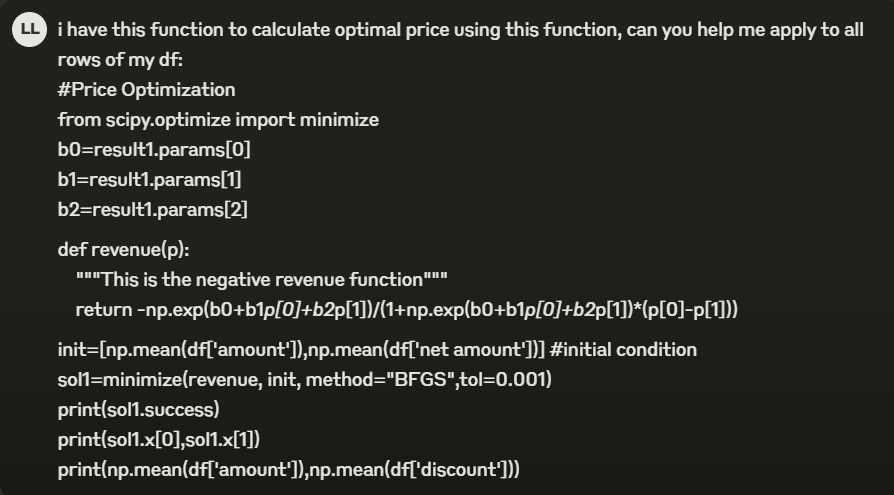


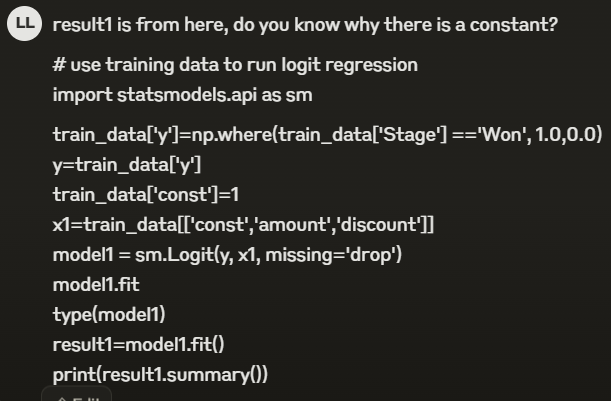